In [1]:
#import necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data from csv file

In [2]:
#Import Breast Cancer Data-set
cell_df = pd.read_csv("D:\Subject\MLDL\Datasets\cell_samples.csv")
cell_df.head()
cell_df.shape

(699, 11)

In [3]:
#Size of the data set in bytes
cell_df.size

7689

In [4]:
#Column wise count of attributes
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [5]:
#Count of values in each row. Find the frequecy of each type of entry
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Distribution of the data set 

In [6]:
benign_df=cell_df[cell_df['Class']==2][0:200]
malignant_df=cell_df[cell_df['Class']==4][0:200]

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

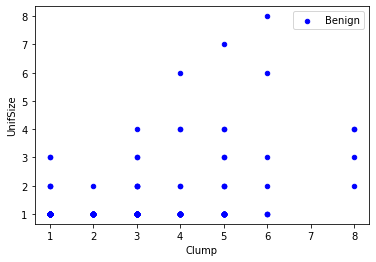

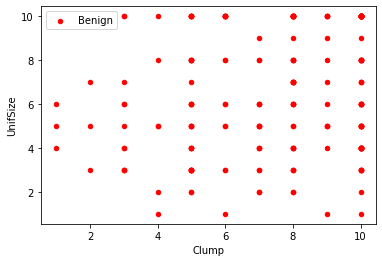

In [7]:
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize',color='red',label='Benign')

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

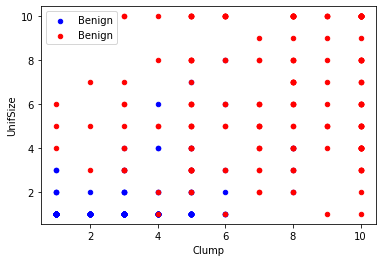

In [8]:
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize',color='red',label='Benign',ax=axes)

In [9]:
#identifying unwanted rows
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [10]:
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]


In [11]:
cell_df['BareNuc'] = cell_df['BareNuc'].astype ('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
#Removing unwanted columns
cell_df.columns
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#From  cell_df 100 rows and 11 columns, picked 9 columns

#Independent variable
x=np.asarray(feature_df)

#Dependent variable

y=np.asarray(cell_df['Class'])

x[0:5]
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [13]:
#Next, we will divide the data into train and test split. The followingcode will split the dataset into 70% training data and 30% of testing data −
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=4)
x_train.shape


(546, 9)

In [14]:
y_train.shape

(546,)

In [15]:
x_test.shape

(137, 9)

In [16]:
y_test.shape

(137,)

In [ ]:
# Modeling SVM using Scikit-learn

from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

In [18]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred


array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

In [19]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))

cm

Accuracy :  0.9635036496350365


array([[85,  5],
       [ 0, 47]], dtype=int64)

In [20]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf')  
classifier.fit(x_train, y_train)  

#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

In [21]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9635036496350365


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

